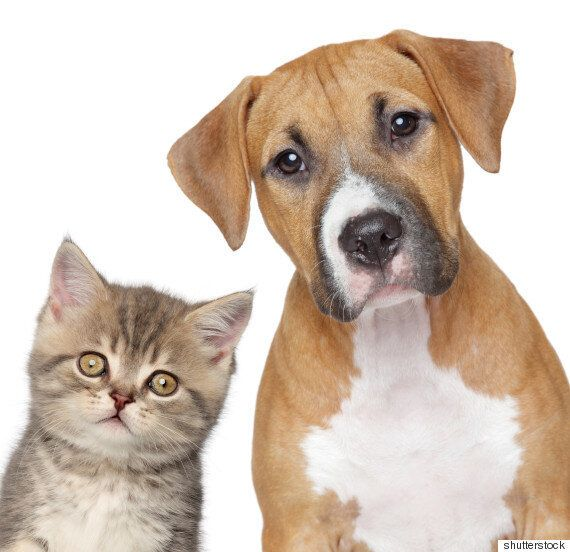

In [45]:
image_url = 'https://cdn.huffingtonpost.kr/news/photo/201602/22260_43420.jpeg'

from PIL import Image
from io import BytesIO
import requests

Image.open(BytesIO(requests.get(image_url).content))

In [46]:
key = '789efeb3b4264264afe12e28eb3f0f73'
endpoint = 'https://labuser93computervision.cognitiveservices.azure.com/'
endpoint = endpoint + 'vision/v2.0/'

analyze_endpoint = endpoint + 'analyze' # 분석
detect_endpoint = endpoint + 'detect' # 객체 탐지
ocr_endpoint = endpoint + 'ocr' # 글자 인식

headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [47]:
response = requests.post(analyze_endpoint,
                         headers=headers,
                         params=params,
                         json=data)
result = response.json()
result['description']['captions'][0]['text']

'a close up of a dog and a cat looking at the camera'

In [48]:
# Object Detection
response = requests.post(detect_endpoint,
                         headers=headers,
                         json=data)

result = response.json()
result

{'objects': [{'rectangle': {'x': 195, 'y': 53, 'w': 360, 'h': 493},
   'object': 'dog',
   'confidence': 0.92,
   'parent': {'object': 'mammal',
    'confidence': 0.934,
    'parent': {'object': 'animal', 'confidence': 0.935}}},
  {'rectangle': {'x': 0, 'y': 235, 'w': 260, 'h': 317},
   'object': 'cat',
   'confidence': 0.869,
   'parent': {'object': 'mammal',
    'confidence': 0.88,
    'parent': {'object': 'animal', 'confidence': 0.881}}}],
 'requestId': '179b4ac2-6cd9-4b8e-8afb-b74e7092fa6a',
 'metadata': {'height': 552, 'width': 570, 'format': 'Jpeg'}}

In [49]:
from PIL import Image, ImageDraw, ImageFont

In [52]:
image = Image.open(BytesIO(requests.get(image_url).content))
draw = ImageDraw.Draw(image)

In [68]:
def CreateRectangle(objectInfo):
  objects = objectInfo['objects']

  for obj in objects:
    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y), (x+w, y+h)), outline='red')

    print(draw)

In [69]:
CreateRectangle(result)

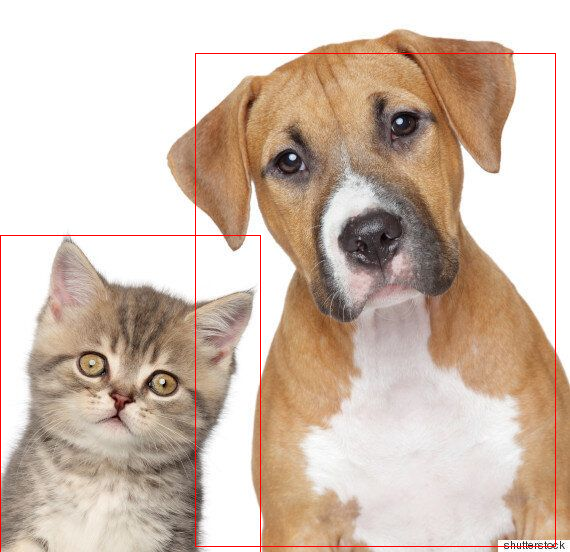

In [70]:
image